<a href="https://colab.research.google.com/github/gsnsg/DL/blob/master/PyTorch/Pytorch_MNIST_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
from tqdm.auto import tqdm
from torchvision import transforms
from torchvision.datasets import MNIST 
from torchvision.utils import make_grid
from torch.utils.data import DataLoader

import numpy as np
import matplotlib.pyplot as plt

In [2]:
def show_tensor_images(image_tensor, num_images = 25, size = (1, 28, 28)):
  image_unflat = image_tensor.detach().cpu().view(-1, *size)
  image_grid = make_grid(image_unflat[: num_images], nrow = 5)
  plt.imshow(image_grid.permute(1, 2, 0).squeeze())
  plt.show()


In [3]:
transform = transforms.Compose([transforms.ToTensor()])

In [4]:
def get_generator_block(input_dim, output_dim):
  return nn.Sequential(
                         nn.Linear(input_dim, output_dim),
                         nn.BatchNorm1d(output_dim),
                         nn.ReLU(inplace = True)
  )

In [5]:
class Generator(nn.Module):
  def __init__(self, z_dim=10, im_dim=784, hidden_dim=128):
    super(Generator, self).__init__()
    self.gen = nn.Sequential(
        get_generator_block(z_dim, hidden_dim * 2),
        get_generator_block(hidden_dim * 2, hidden_dim * 4),
        get_generator_block(hidden_dim * 4, hidden_dim * 8),
        nn.Linear(hidden_dim * 8, im_dim),
        nn.Sigmoid()
    )

  def forward(self, noise):
    return self.gen(noise)
  

  def get_gen(self):
    return self.gen

In [6]:
def get_discriminator_block(input_dim, output_dim):
  return nn.Sequential(
      nn.Linear(input_dim, output_dim),
      nn.LeakyReLU(negative_slope = 0.2)
  )

In [7]:
class Discriminator(nn.Module):
  def __init__(self, im_dim = 784, hidden_dim = 128):
    super(Discriminator, self).__init__()
    self.disc = nn.Sequential(
        get_discriminator_block(im_dim, hidden_dim * 4),
        get_discriminator_block(hidden_dim * 4, hidden_dim * 2),
        get_discriminator_block(hidden_dim * 2, hidden_dim),
        nn.Linear(hidden_dim, 1)
    )
  
  def forward(self, image):
    return self.disc(image)

  def get_disc(self):
    return self.disc

In [8]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
criterion = nn.BCEWithLogitsLoss()
n_epochs = 300
z_dim = 64
display_step = 500
batch_size = 128
lr = 0.00001
dataloader = DataLoader(
    MNIST('.', download=True, transform=transforms.ToTensor()),
    batch_size=batch_size,
    shuffle=True)

In [18]:
gen = Generator(z_dim).to(device)
disc = Discriminator().to(device)

gen_opt = torch.optim.Adam(gen.parameters(), lr = lr)
disc_opt = torch.optim.Adam(disc.parameters(), lr = lr)

In [19]:
def get_noise(num_images, z_dim, device = 'cpu'):
  return torch.randn(num_images, z_dim).to(device)

In [20]:
def get_disc_loss(gen, disc, criterion, real, num_images, z_dim, device):
  fake_noise = get_noise(num_images, z_dim, device)
  fake = gen(fake_noise).detach()
  disc_fake_pred = disc(fake)
  disc_fake_loss = criterion(disc_fake_pred, torch.zeros(num_images, 1).to(device))
  disc_real_pred = disc(real)
  disc_real_loss = criterion(disc_real_pred, torch.ones(num_images, 1).to(device))
  disc_loss = (disc_fake_loss + disc_real_loss) / 2
  #### END CODE HERE ####
  return disc_loss

In [21]:
def get_gen_loss(gen, disc, criterion, num_images, z_dim, device):
  fake_noise = get_noise(num_images, z_dim, device)
  fake = gen(fake_noise)
  pred = disc(fake)
  gen_loss = criterion(pred, torch.ones(num_images, 1).to(device))
  return gen_loss

Step 500: Generator loss: 1.4454213424921016, discriminator loss: 0.42497018605470693


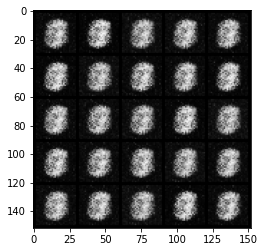

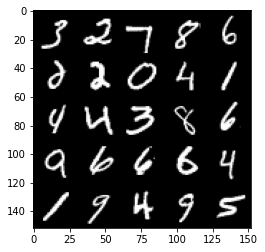

Step 1000: Generator loss: 1.7781459228992464, discriminator loss: 0.28380535519123073


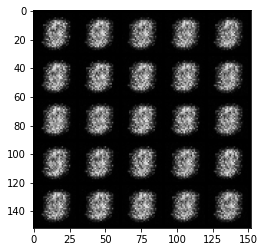

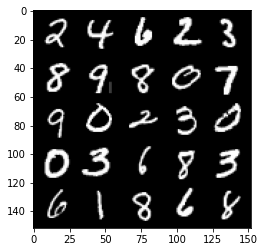

Step 1500: Generator loss: 2.073056695699692, discriminator loss: 0.16336465027928337


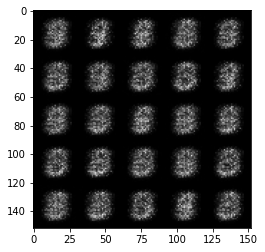

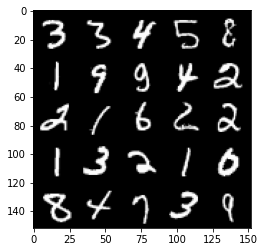

Step 2000: Generator loss: 1.7500141749382019, discriminator loss: 0.22298346027731888


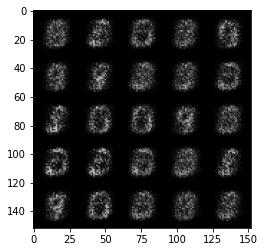

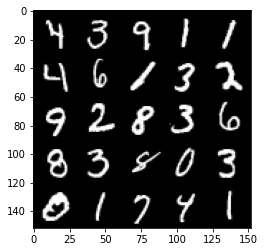

Step 2500: Generator loss: 1.743691244363786, discriminator loss: 0.20356101801991466


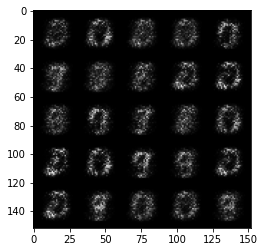

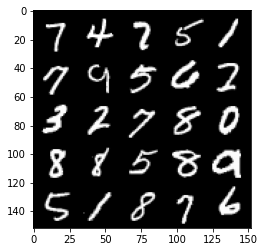

Step 3000: Generator loss: 2.0925741243362443, discriminator loss: 0.141603982359171


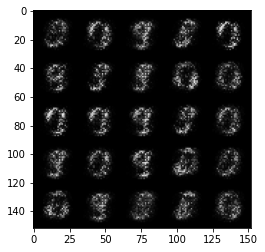

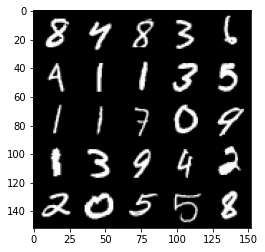

Step 3500: Generator loss: 2.4840111389160167, discriminator loss: 0.12478477759659283


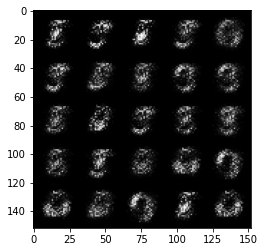

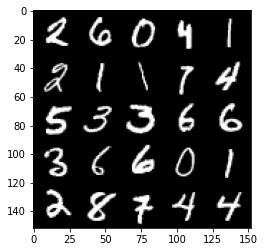

Step 4000: Generator loss: 2.753924336910249, discriminator loss: 0.12765269117057332


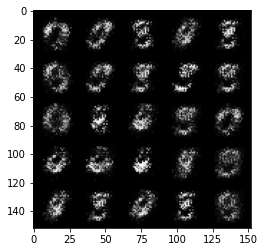

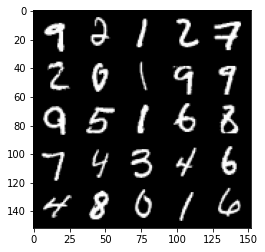

Step 4500: Generator loss: 3.28485038137436, discriminator loss: 0.09567483358830214


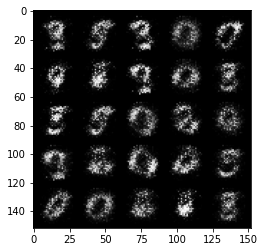

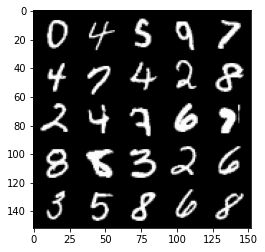

Step 5000: Generator loss: 3.6274283337593083, discriminator loss: 0.07863156886398792


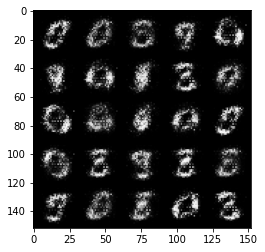

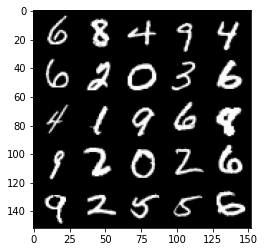

Step 5500: Generator loss: 3.750639827728274, discriminator loss: 0.07460859329253432


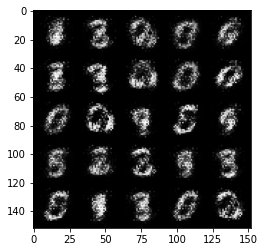

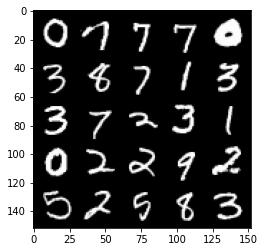

Step 6000: Generator loss: 3.8131943850517254, discriminator loss: 0.08385965023934842


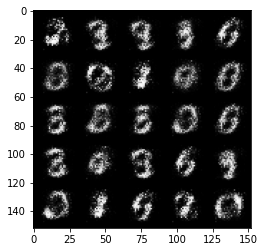

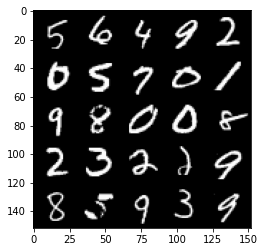

Step 6500: Generator loss: 3.8835549201965307, discriminator loss: 0.07723160559684039


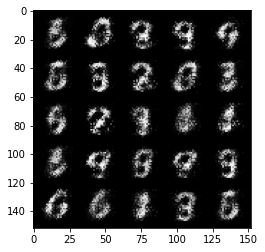

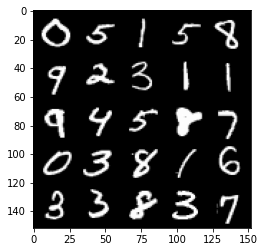

Step 7000: Generator loss: 4.008926292896272, discriminator loss: 0.059564486604183946


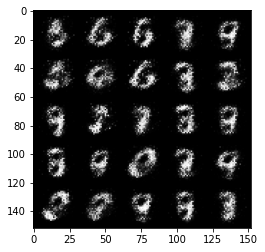

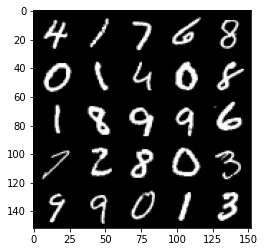

Step 7500: Generator loss: 4.442694675445561, discriminator loss: 0.05424453462287787


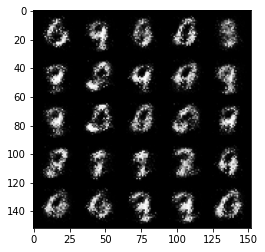

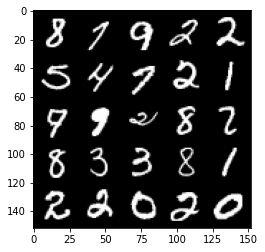

Step 8000: Generator loss: 4.384868028163911, discriminator loss: 0.053720254521817


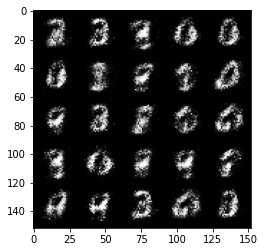

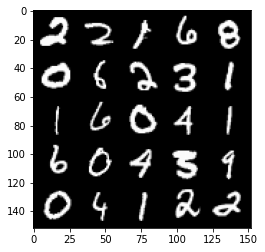

Step 8500: Generator loss: 4.424234806537628, discriminator loss: 0.0577154016755522


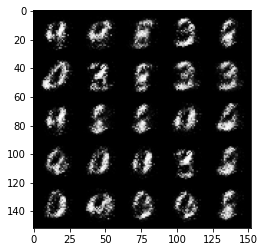

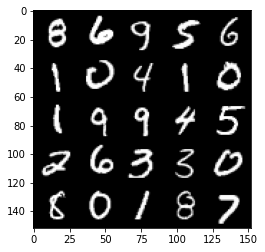

Step 9000: Generator loss: 4.3353492360115045, discriminator loss: 0.05881642673164608


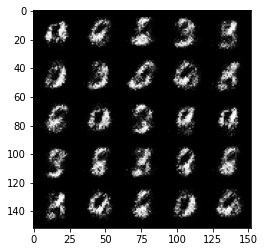

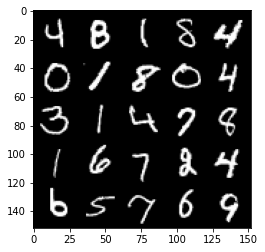

Step 9500: Generator loss: 4.262513748645784, discriminator loss: 0.05431397610902787


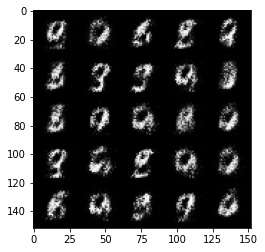

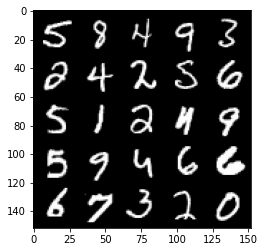

Step 10000: Generator loss: 4.452247020721429, discriminator loss: 0.053288652997463944


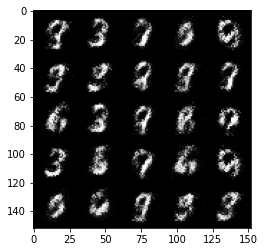

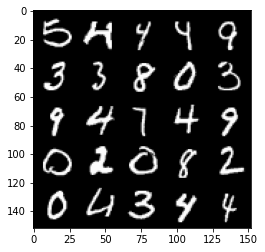

Step 10500: Generator loss: 4.523494692802428, discriminator loss: 0.049689377203583684


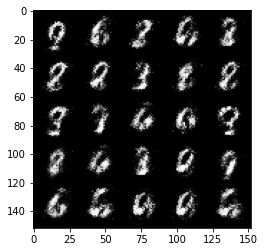

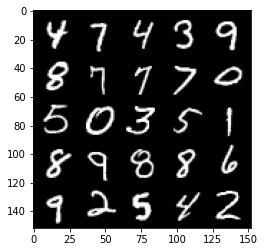

Step 11000: Generator loss: 4.678987412452702, discriminator loss: 0.04905856247246261


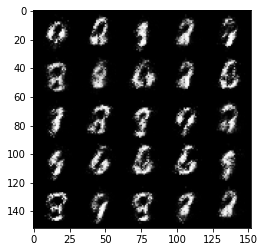

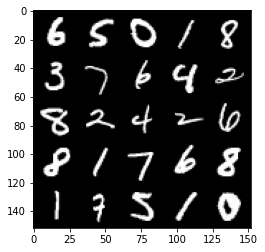

Step 11500: Generator loss: 4.541362404346467, discriminator loss: 0.05736519479379059


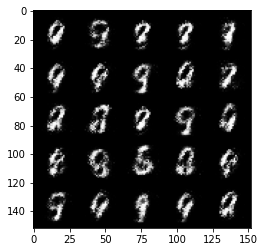

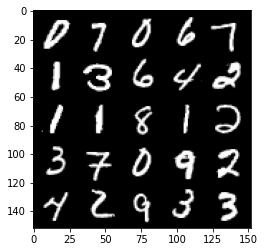

Step 12000: Generator loss: 4.486178263187407, discriminator loss: 0.06470730437710875


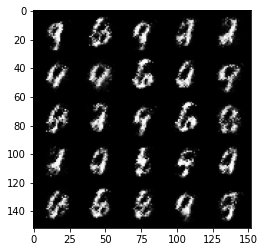

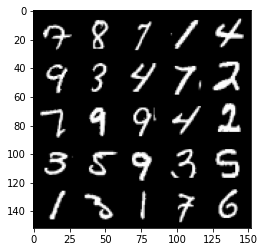

Step 12500: Generator loss: 4.788634884834293, discriminator loss: 0.0606607901193202


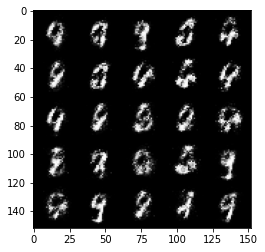

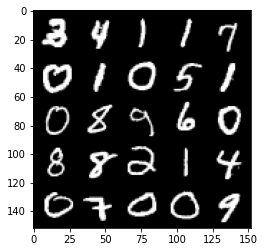

Step 13000: Generator loss: 4.633891285896295, discriminator loss: 0.06788683824986222


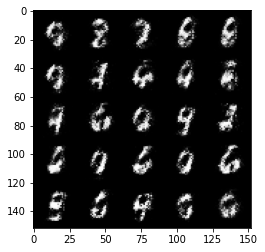

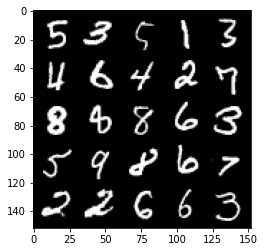

Step 13500: Generator loss: 4.309966147422789, discriminator loss: 0.07593219839781518


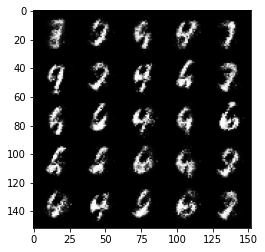

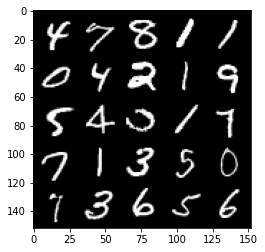

Step 14000: Generator loss: 4.073227263450623, discriminator loss: 0.08640691813081501


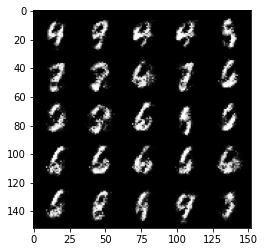

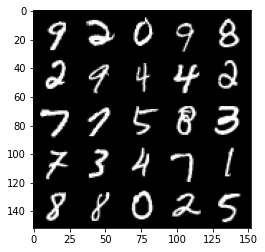

Step 14500: Generator loss: 4.230863052368164, discriminator loss: 0.07745779987424614


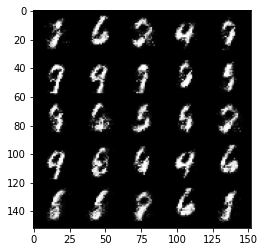

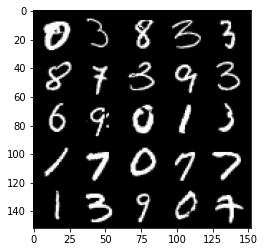

Step 15000: Generator loss: 4.150377346038817, discriminator loss: 0.07131293360143896


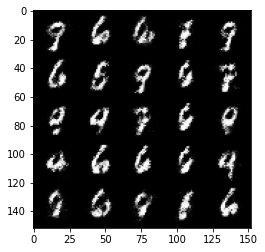

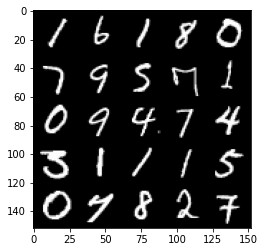

Step 15500: Generator loss: 4.172955150127409, discriminator loss: 0.07838159295171498


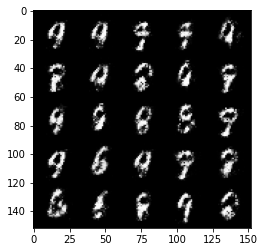

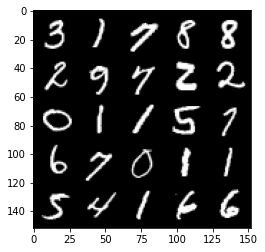

Step 16000: Generator loss: 4.176579249382017, discriminator loss: 0.08560495820641517


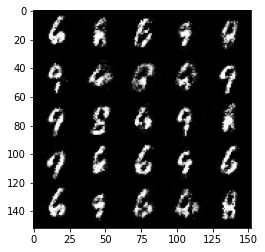

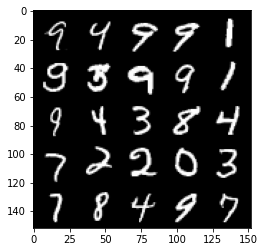

Step 16500: Generator loss: 4.058637860774992, discriminator loss: 0.09404105337709186


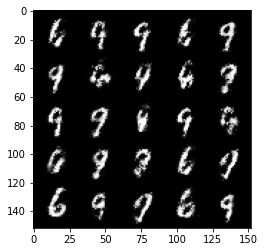

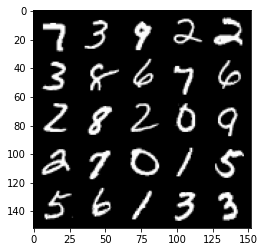

Step 17000: Generator loss: 3.8699553065300027, discriminator loss: 0.10338594840466975


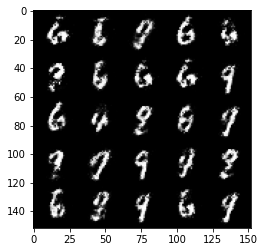

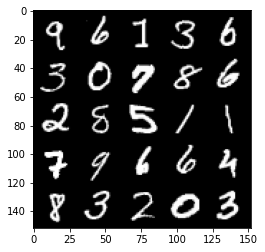

Step 17500: Generator loss: 3.7537715306282036, discriminator loss: 0.1124676517099142


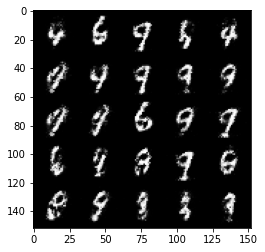

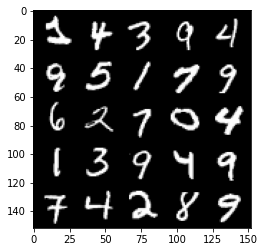

Step 18000: Generator loss: 3.6167885785102847, discriminator loss: 0.12387603619694706


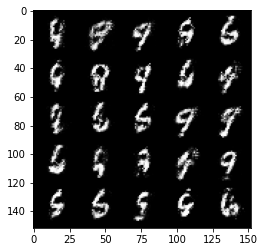

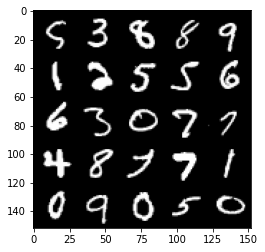

Step 18500: Generator loss: 3.84531503582001, discriminator loss: 0.11289250796288253


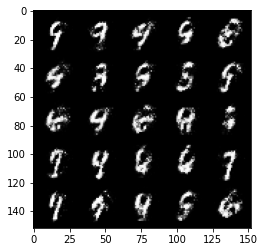

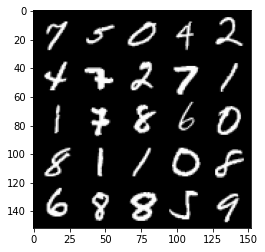

Step 19000: Generator loss: 3.601588618755339, discriminator loss: 0.1331846154779195


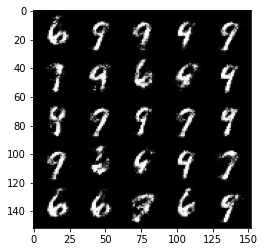

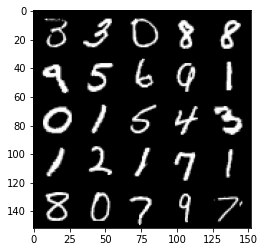

Step 19500: Generator loss: 3.5145786066055296, discriminator loss: 0.14199093779921532


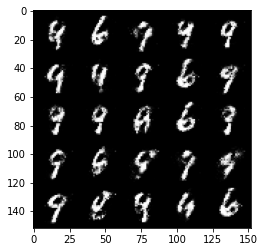

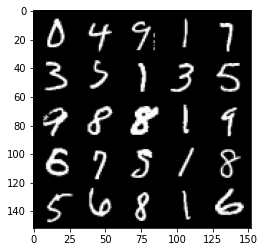

Step 20000: Generator loss: 3.45992902994156, discriminator loss: 0.14228823520243167


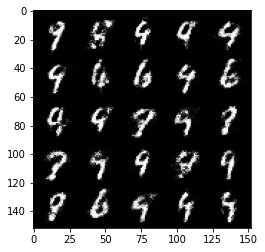

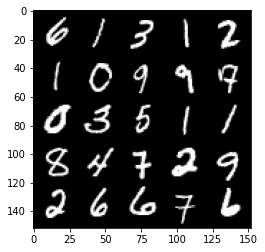

Step 20500: Generator loss: 3.404486127853392, discriminator loss: 0.15040101422369476


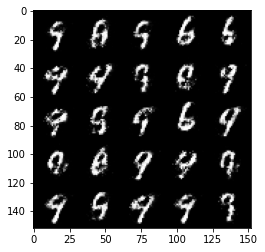

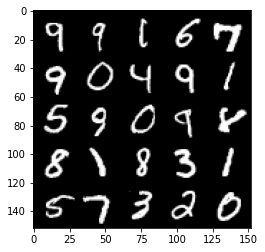

Step 21000: Generator loss: 3.473837304592133, discriminator loss: 0.13790788167715068


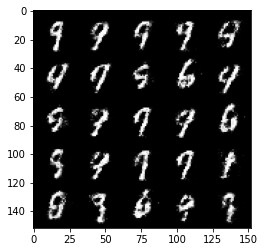

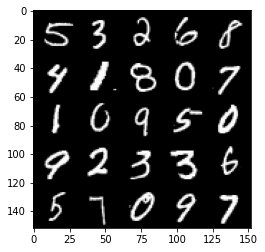

Step 21500: Generator loss: 3.516292400836947, discriminator loss: 0.12448197995871318


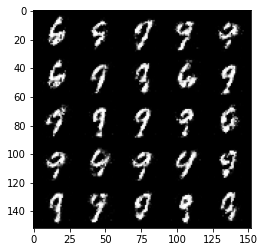

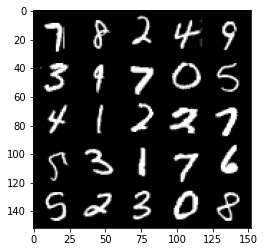

Step 22000: Generator loss: 3.630713308334351, discriminator loss: 0.13388232244551188


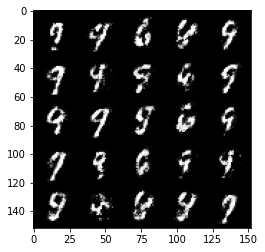

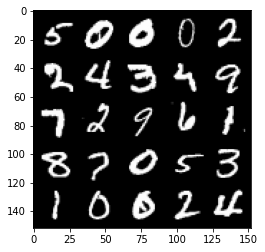

Step 22500: Generator loss: 3.4996862549781804, discriminator loss: 0.13641242098063228


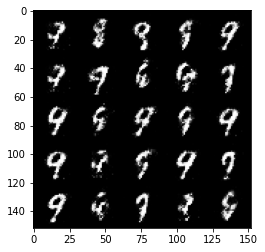

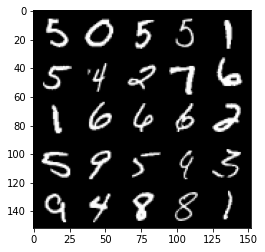

Step 23000: Generator loss: 3.516258151054381, discriminator loss: 0.14273967909812924


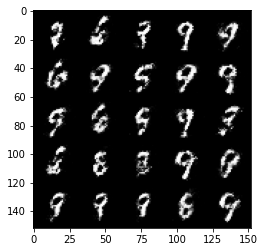

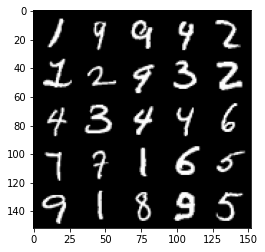

Step 23500: Generator loss: 3.254881121158598, discriminator loss: 0.16896187910437582


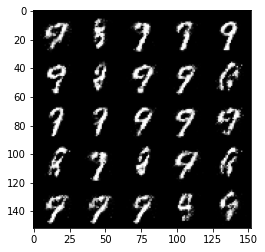

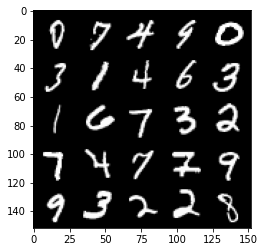

Step 24000: Generator loss: 3.090147072315218, discriminator loss: 0.18621870015561567


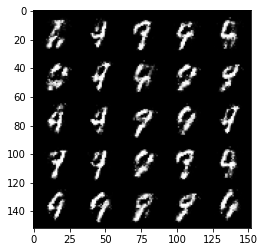

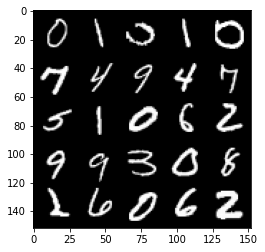

Step 24500: Generator loss: 3.190078729629518, discriminator loss: 0.1614610731601714


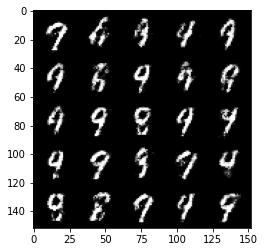

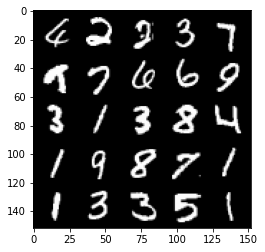

Step 25000: Generator loss: 3.1628982458114585, discriminator loss: 0.16785782861709594


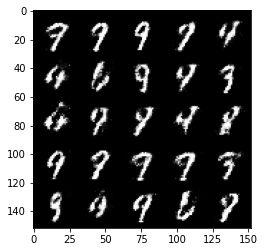

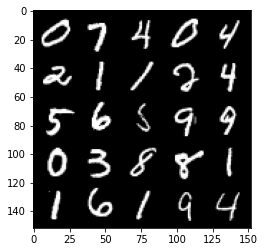

Step 25500: Generator loss: 3.139913884162907, discriminator loss: 0.17589885547757134


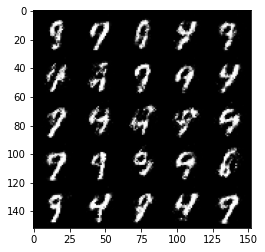

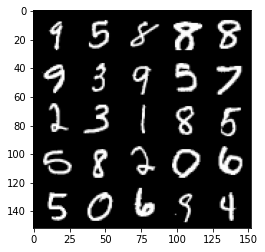

Step 26000: Generator loss: 2.992799263954165, discriminator loss: 0.19031513081490994


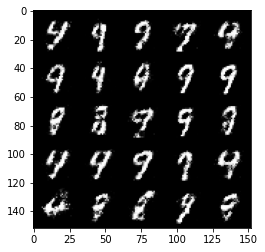

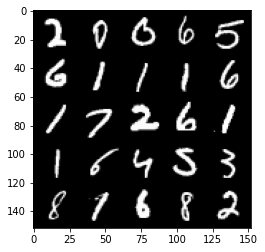

Step 26500: Generator loss: 2.87713874769211, discriminator loss: 0.1940020031183956


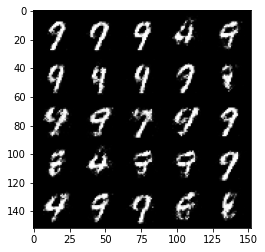

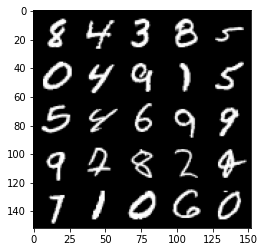

Step 27000: Generator loss: 2.9243917603492764, discriminator loss: 0.19705534024536595


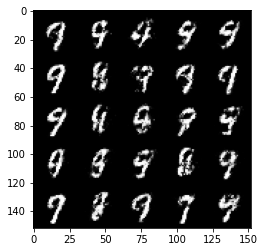

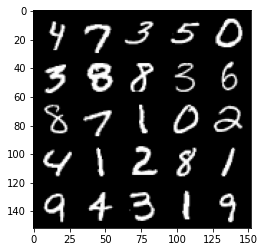

Step 27500: Generator loss: 2.8799319839477544, discriminator loss: 0.20170412881672384


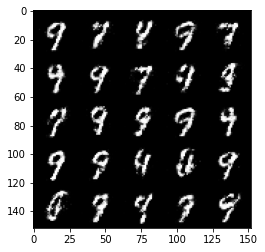

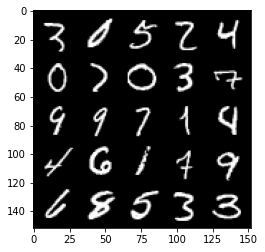

Step 28000: Generator loss: 2.9263477172851564, discriminator loss: 0.1919037923216818


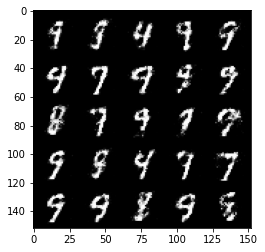

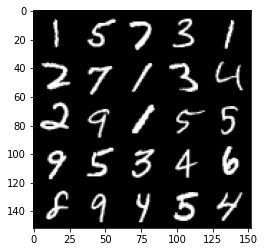

Step 28500: Generator loss: 2.82648783826828, discriminator loss: 0.20992389090359215


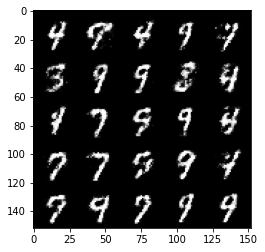

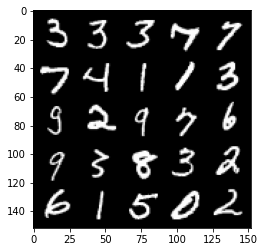

Step 29000: Generator loss: 2.751551377296446, discriminator loss: 0.202853005707264


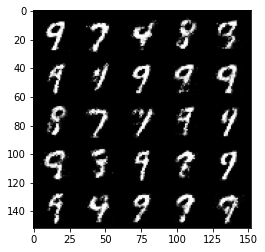

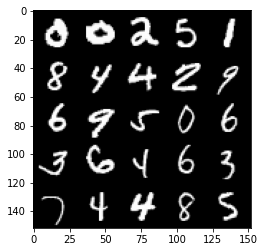

Step 29500: Generator loss: 2.754964181900025, discriminator loss: 0.20042569614946842


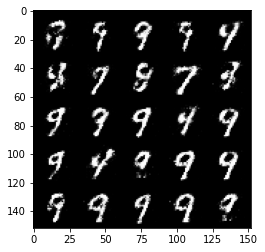

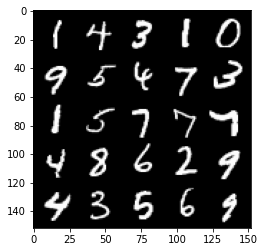

Step 30000: Generator loss: 2.7521385827064493, discriminator loss: 0.18922265058755888


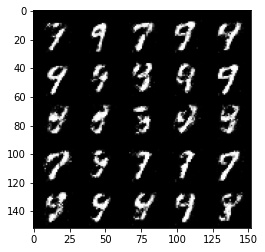

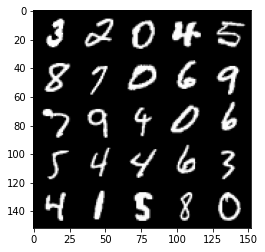

Step 30500: Generator loss: 2.74813710641861, discriminator loss: 0.2047663405686617


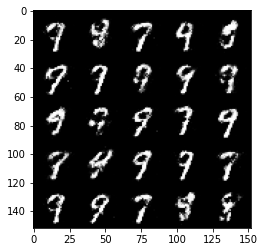

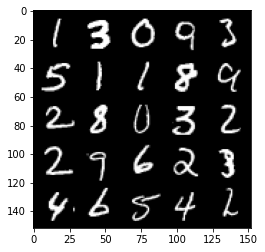

Step 31000: Generator loss: 2.6714565320014954, discriminator loss: 0.20770401021838197


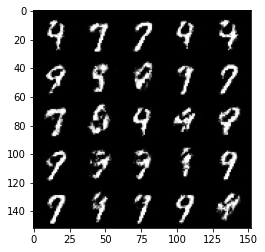

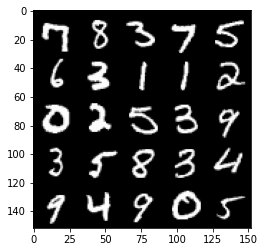

Step 31500: Generator loss: 2.7051946554183997, discriminator loss: 0.19641855375468717


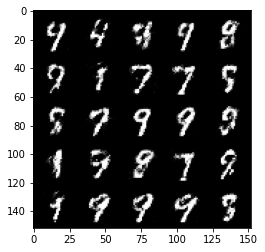

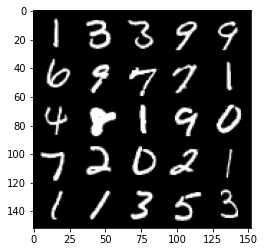

Step 32000: Generator loss: 2.746773495197297, discriminator loss: 0.19325074854493138


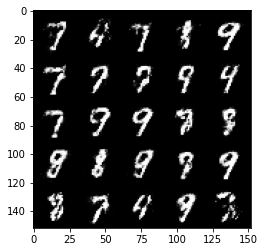

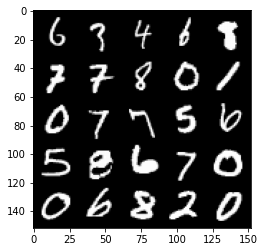

Step 32500: Generator loss: 2.6884179043769834, discriminator loss: 0.22094131366908548


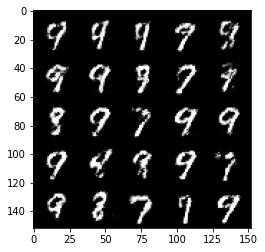

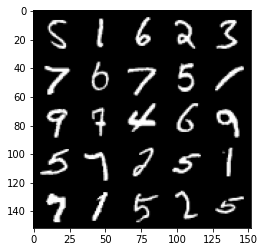

Step 33000: Generator loss: 2.602025255441668, discriminator loss: 0.2273321802914143


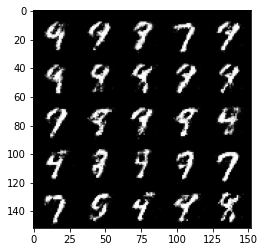

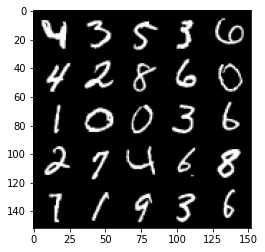

Step 33500: Generator loss: 2.54049607515335, discriminator loss: 0.22712997090816503


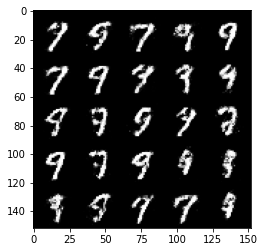

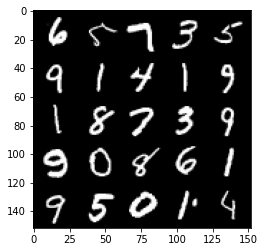

Step 34000: Generator loss: 2.5496128029823297, discriminator loss: 0.2316588427424431


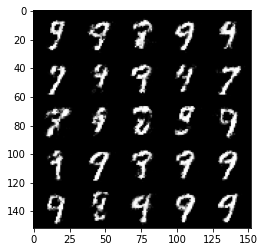

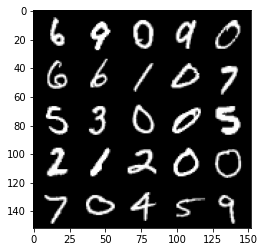

Step 34500: Generator loss: 2.5566769201755557, discriminator loss: 0.22302456757426256


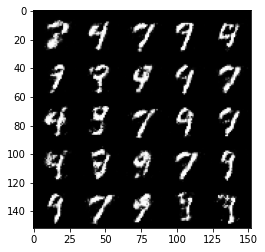

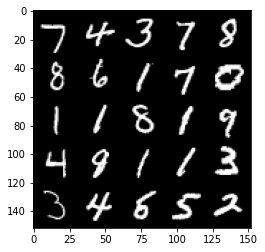

Step 35000: Generator loss: 2.5038655445575726, discriminator loss: 0.23361289495229726


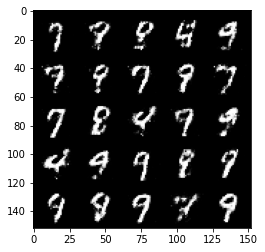

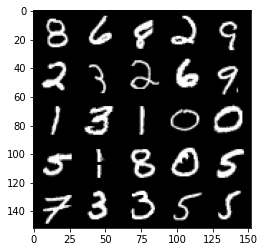

Step 35500: Generator loss: 2.479224308729176, discriminator loss: 0.23674684292078021


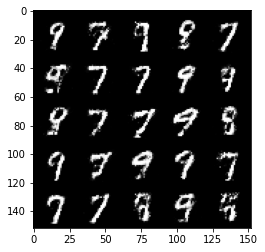

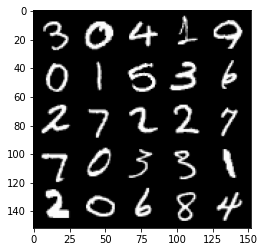

Step 36000: Generator loss: 2.408118366241454, discriminator loss: 0.25157082778215406


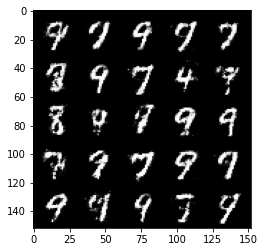

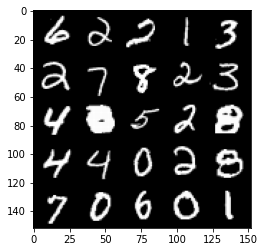

Step 36500: Generator loss: 2.351827826023098, discriminator loss: 0.258193811148405


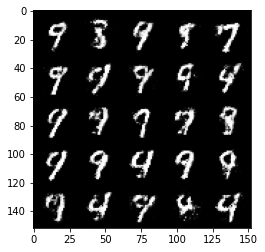

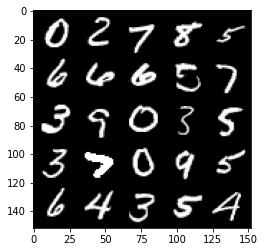

Step 37000: Generator loss: 2.392829961538316, discriminator loss: 0.24812094295024878


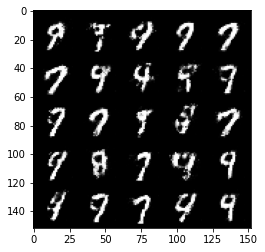

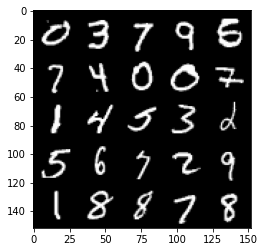

Step 37500: Generator loss: 2.3949328894615216, discriminator loss: 0.24186748823523527


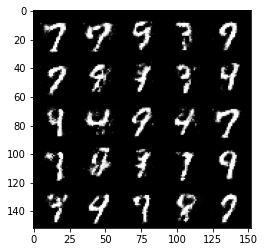

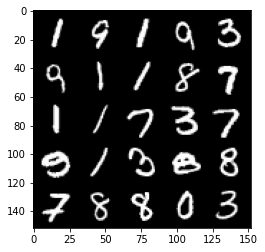

Step 38000: Generator loss: 2.3861870079040504, discriminator loss: 0.24259131741523748


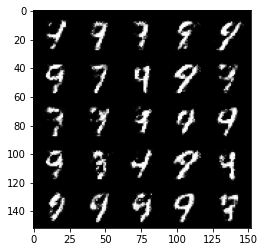

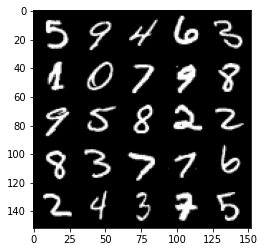

Step 38500: Generator loss: 2.3225379390716525, discriminator loss: 0.25723409828543675


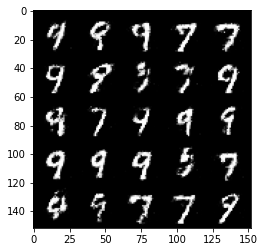

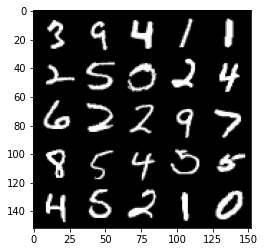

Step 39000: Generator loss: 2.298567266464235, discriminator loss: 0.2667556439638139


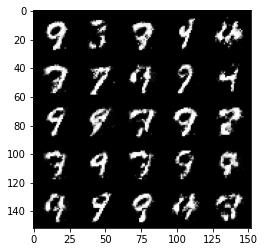

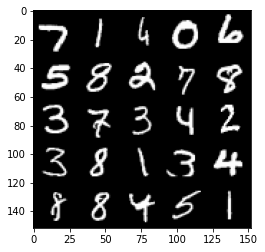

Step 39500: Generator loss: 2.291399811029435, discriminator loss: 0.2547992561161519


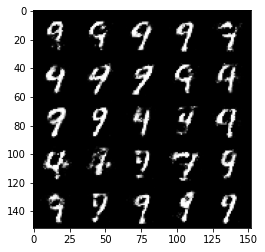

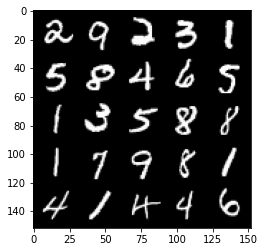

Step 40000: Generator loss: 2.3132166233062765, discriminator loss: 0.2655964465737344


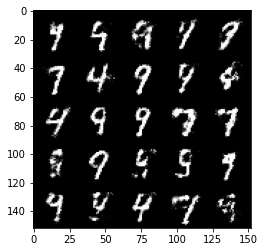

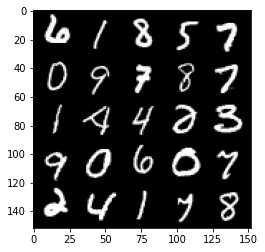

Step 40500: Generator loss: 2.309729642391206, discriminator loss: 0.2627049731314182


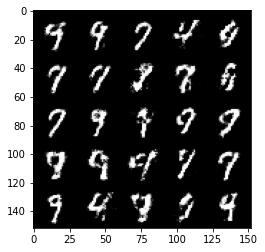

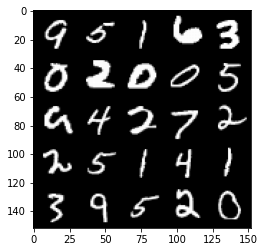

Step 41000: Generator loss: 2.2878573675155622, discriminator loss: 0.26151708579063415


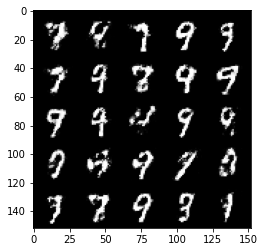

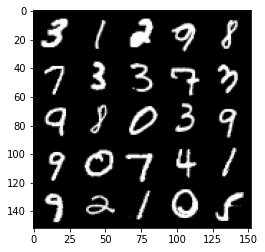

Step 41500: Generator loss: 2.3149572250843025, discriminator loss: 0.2570066860616207


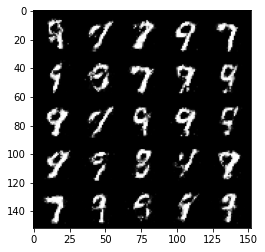

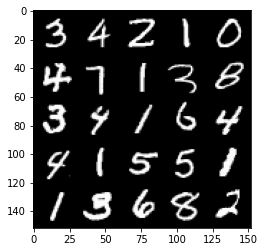

Step 42000: Generator loss: 2.2399475579261803, discriminator loss: 0.279561873614788


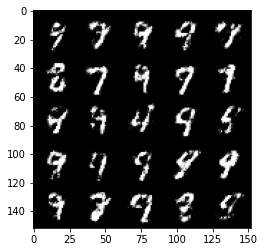

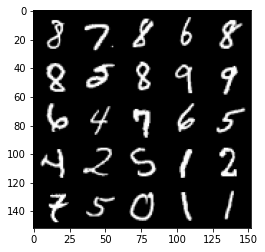

Step 42500: Generator loss: 2.1699923360347784, discriminator loss: 0.29223106846213337


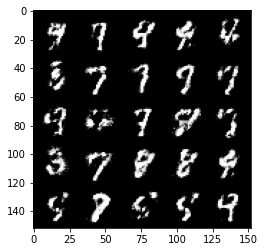

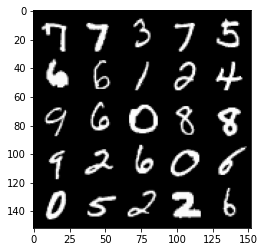

Step 43000: Generator loss: 2.159334543466568, discriminator loss: 0.2961666963696481


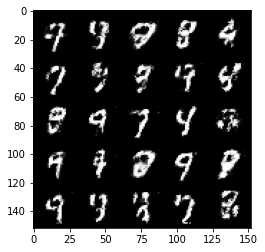

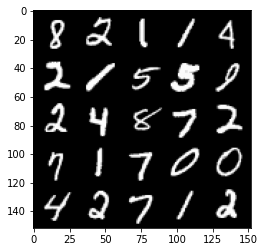

Step 43500: Generator loss: 2.2146559562683086, discriminator loss: 0.2764222565293312


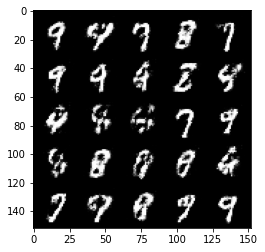

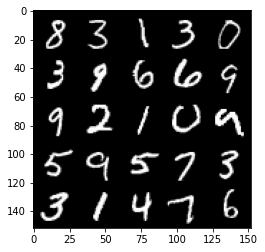

Step 44000: Generator loss: 2.1082833063602457, discriminator loss: 0.3211097585558888


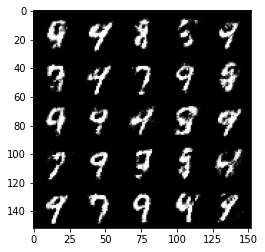

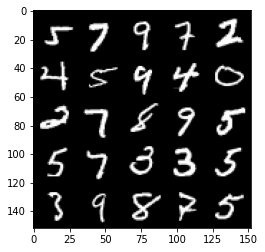

Step 44500: Generator loss: 2.129441803216935, discriminator loss: 0.3162133565545082


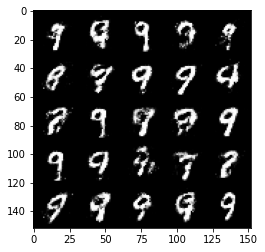

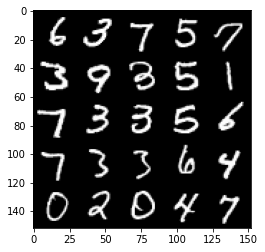

Step 45000: Generator loss: 2.0946451127529158, discriminator loss: 0.30859053474664694


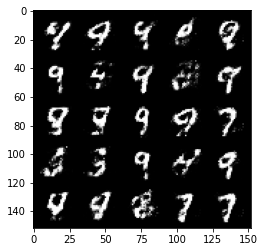

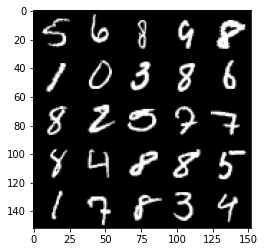

In [ ]:
cur_step = 0
mean_generator_loss = 0
mean_discriminator_loss = 0
test_generator = True # Whether the generator should be tested
gen_loss = False

for epoch in range(n_epochs):

  for real, _ in tqdm(dataloader):

    curr_batch_size = real.shape[0]

    real = real.view(curr_batch_size, -1).to(device)

    disc_opt.zero_grad()
    disc_loss = get_disc_loss(gen, disc, criterion, real, curr_batch_size, z_dim, device)
    disc_loss.backward()
    disc_opt.step()

    gen_opt.zero_grad()
    gen_loss = get_gen_loss(gen, disc, criterion, curr_batch_size, z_dim, device)
    gen_loss.backward()
    gen_opt.step()

    mean_discriminator_loss += disc_loss.item() / display_step

    mean_generator_loss += gen_loss.item() / display_step

    if cur_step % display_step == 0 and cur_step > 0:
      print(f"Step {cur_step}: Generator loss: {mean_generator_loss}, discriminator loss: {mean_discriminator_loss}")
      fake_noise = get_noise(curr_batch_size, z_dim, device=device)
      fake = gen(fake_noise)
      show_tensor_images(fake)
      show_tensor_images(real)
      mean_generator_loss = 0
      mean_discriminator_loss = 0
    cur_step += 1
